# 7/16 情報工学工房
今日の内容<br>
解説編
- gensimによるword2vecの使い方
- MeCabを用いた形態素解析

演習編<br>
- 100本ノック7章の60～63を解く(word2vec)
- 100本ノック4章の31,32を解く(形態素解析)
    4章は30は飛ばして，neko.txtを1行ずつpythonで読み出して処理．

[Word2Vecの学習済み日本語モデルを読み込んで使う](https://qiita.com/omuram/items/6570973c090c6f0cb060)



## 形態素解析
それ以上分解すると意味がわからなくなるまで分けたやつ<br>
日本語→単語に分割して品詞を解析するところまで<br>
便利なやつがMeCab
MeCabを入れて試してみる


In [5]:
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
#バージョン指定
!pip install mecab-python3==0.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
  swig3.0
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl lib

In [ ]:
import MeCab
m = MeCab.Tagger('-Ochasen')
#バグが起きないように入れておくやつ
m.parse('')
text  = '我輩は猫である。名前はまだ無い。'
node = m.parseToNode('我輩は猫である。名前はまだ無い。')
while node:
    # surfaceで単語(表層形)，featureで品詞情報がとれる
    print(node.surface, node.feature)
    node = node.next
# 単語に分割する場合
m = MeCab.Tagger('-Owakati')
# parseはスペース区切りで返ってくるのでsplitでリストに．最後の単語は"\n"になっているので注意．
words = m.parse('我輩は猫である。名前はまだ無い。').split(" ")
print(words)

 BOS/EOS,*,*,*,*,*,*,*,*
我輩 名詞,一般,*,*,*,*,我輩,ワガハイ,ワガハイ
は 助詞,係助詞,*,*,*,*,は,ハ,ワ
猫 名詞,一般,*,*,*,*,猫,ネコ,ネコ
で 助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある 助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。 記号,句点,*,*,*,*,。,。,。
名前 名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は 助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ 副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い 形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。 記号,句点,*,*,*,*,。,。,。
 BOS/EOS,*,*,*,*,*,*,*,*
['我輩', 'は', '猫', 'で', 'ある', '。', '名前', 'は', 'まだ', '無い', '。', '\n']


#言語処理100本ノック　31,32,60~63<br>
https://nlp100.github.io/ja/



Mecabお試し



In [6]:
import MeCab
#品詞に分解
m = MeCab.Tagger('-Ochasen')

#バグが起きないように入れておくやつ
m.parse('')

#テキストファイルを読み込む
f = open('neko.txt','r')
text  = f.read()
f.close

#ノードにテキスト
node = m.parseToNode(text)

while node:
    # surfaceで単語(表層形)，featureで品詞情報がとれる
    print(node.surface)
    node = node.next


# 単語に分割する場合
m = MeCab.Tagger('-Owakati')
# parseはスペース区切りで返ってくるのでsplitでリストに．最後の単語は"\n"になっているので注意．
words = m.parse(text).split(" ")
#print(words)

ストリーミング出力は最後の 5000 行に切り捨てられました。
この
本
は
古い
本
だ
が
、
この
時代
から
女
の
わるい
事
は
歴然と
分っ
てる
」
と
云う
と
、
寒月
君
が
「
少し
驚き
まし
た
な
。
元来
い
つ
頃
の
本
です
か
」
と
聞く
。
「
タマス・ナッシ
と
云っ
て
十
六
世紀
の
著書
だ
」
「
いよいよ
驚
ろ
い
た
。
その
時分
すでに
私
の
妻
の
悪口
を
云っ
た
もの
が
ある
ん
です
か
」
「
いろいろ
女
の
悪口
が
ある
が
、
その
内
に
は
是非
君
の
妻
も
這入る
訳
だ
から
聞く
が
いい
」
「
ええ
聞き
ます
よ
。
ありがたい
事
に
なり
まし
た
ね
」
「
まず
古来
の
賢哲
が
女性
観
を
紹介
す
べし
と
書い
て
ある
。
いい
かね
。
聞い
てる
か
ね
」
「
みんな
聞い
てる
よ
。
独身
の
僕
まで
聞い
てる
よ
」
「
アリストートル
曰く
女
は
どうせ
碌
で
なし
なれ
ば
、
嫁
を
とる
なら
、
大きな
嫁
より
小さな
嫁
を
とる
べし
。
大きな
碌
で
なし
より
、
小さな
碌
で
なし
の
方
が
災
少なし
…
…
」
「
寒月
君
の
妻君
は
大きい
かい
、
小さい
かい
」
「
大きな
碌
で
なし
の
部
です
よ
」
「
ハハハハ
、
こりゃ
面白い
本
だ
。
さあ
あと
を
読ん
だ
」
「
或
る
人
問う
、
いかなる
か
これ
最大
奇蹟
。
賢者
答え
て
曰く
、
貞婦
…
…
」
「
賢者
って
だれ
です
か
」
「
名前
は
書い
て
ない
」
「
どうせ
振ら
れ
た
賢者
に
相違
ない
ね
」
「
次
に
は
ダイオジニス
が
出
て
いる
。
或
る
人
問う
、
妻
を
娶る
いずれ
の
時
において
す
べき
か
。
ダイオジニス
答え
て
曰く
青年
は
未
だし
、
老年
は
すでに
遅し
。
と
ある
」
「
先生
樽
の
中
で
考え
た
ね
」
「
ピサゴラス
曰く
天下
に
三
の
恐るべき
もの
あり
曰く
火
、
曰く
水
、
曰く
女
」
「
希
臘
の
哲学
者
など
は
存外
迂
濶
な
事
を
云う
もの
だ
ね
。
僕
に
云

In [10]:
#32 動詞の原型の抽出
import MeCab
#品詞に分解
m = MeCab.Tagger('-Ochasen')
#バグが起きないように入れておくやつ
m.parse('')

#テキストファイルを読み込む
f = open('neko.txt','r')
text  = f.read()
f.close

#ノードにテキスト
node = m.parseToNode(text)
while node:
    # surfaceで単語(表層形)，featureで品詞情報がとれる
    type(node.feature.split(',')[0])
    if node.feature.split(',')[0] == '動詞':
          print(node.feature.split(",")[6] )
    node = node.next

ストリーミング出力は最後の 5000 行に切り捨てられました。
出来る
見る
追う
返る
いる
見える
刈り込む
く
かためる
控える
いる
云う
刈る
見える
延ばす
惹く
かぎる
出来る
知れる
見る
分る
名づける
られる
着こなす
与える
印す
いる
坐る
こまる
いる
かしこまる
控える
する
及ぶ
する
いる
逢う
する
する
坐る
生れる
得る
構える
かかわる
見る
かよう
する
具える
いる
思う
ある
やる
なる
なる
いう
ある
思う
れる
なす
云う
する
侮る
なる
しでかす
知れる
飲む
なる
頼む
騒ぎ出す
酔っ払う
取り落す
認める
差支える
ある
恐れ入る
云う
押し付ける
られる
いる
云う
つく
する
出来る
押しやる
敷く
云う
なる
云う
動く
剥げる
かかる
乗る
なさる
云う
する
いる
生きる
する
いる
乗る
見詰める
仕入れる
来る
する
敷く
れる
せる
れる
勧める
立つ
なる
潰す
睨める
する
いる
云う
坐る
生れる
く
切れる
かかる
訴える
いる
かかわる
敷く
控える
いる
かかわる
敷く
敷く
云う
敷く
する
集まる
する
する
する
する
する
する
する
すう
開ける
する
出る
冷やかす
痛み入る
いる
覚える
気取る
する
突きつける
見える
しめる
笑う
する
見る
比する
据わる
いる
流す
目立つ
見える
引き込む
する
いる
する
気がつく
開く
云う
なる
する
いる
つく
いる
忘れる
なる
見る
する
する
する
する
出来る
見る
する
聞く
く
する
やって来る
出来る
寄りつく
寄りつく
もつ
する
わかる
する
いる
くる
込む
云う
ある
考える
分る
見る
参る
する
知れる
聞き出す
来る
話す
する
思う
うむ
話す
云う
向う
たぎる
言う
する
弁ずる
する
おる
教える
云う
困る
する
吃る
する
いる
ある
なる
受け取る
れる
思う
話す
ある
話す
話す
話す
云う
見る
なる
てる
出来る
変える
いう
話す
聞く
する
する
つけ加える
話す
迷う
いる
する
話す
いう
かける
むく
持ち上げる
ぼる
する
見る
ふくらます
吹き出す
向く
困る
なる
ちまう
困る
来る
困る
する
借る
せる
借る
せる
云う
云う
借る
する
借る


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/Colab Notebooks/kobo2020'
%ls

/content/gdrive/My Drive/Colab Notebooks/kobo2020
cbow_params.pkl  GoogleNews-vectors-negative300.bin  repo6.ipynb
cbow.py          negative_sampling_layer.py          repo7.ipynb
ch04/            neko.txt                            simple_rnnlm.py
common/          __pycache__/
dataset/         PyTorchTutorial1.ipynb


In [ ]:
!gzip -d GoogleNews-vectors-negative300.bin.gz

gzip: GoogleNews-vectors-negative300.bin.gz: No such file or directory


In [ ]:
#gensimインストール
!pip install gensim

In [ ]:
import sys
sys.path.append(' . . ')
import gensim
#model = gensim.models.Word2Vec.load('./GoogleNews-vectors-negative300.bin')
model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
#61
model["United_States"]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [ ]:
#62 
model.wv.similarity("United_States","U.S.")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.73107743

In [ ]:
#63
model.most_similar("United_States")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

## ５章
p216のRNNLMの学習

In [12]:
import sys
sys.path.append('..')
import numpy as np
from common.time_layers import *


class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 重みの初期化
        embed_W = (rn(V, D) / 100).astype('f')
        rnn_Wx = (rn(D, H) / np.sqrt(D)).astype('f')
        rnn_Wh = (rn(H, H) / np.sqrt(H)).astype('f')
        rnn_b = np.zeros(H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        # レイヤの生成
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]

        # すべての重みと勾配をリストにまとめる
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, ts):
        for layer in self.layers:
            xs = layer.forward(xs)
        loss = self.loss_layer.forward(xs, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        self.rnn_layer.reset_state()

corpus size:1000,vocabulary size: 418
| epoch 1 | perplexity  388.77
| epoch 2 | perplexity  261.16
| epoch 3 | perplexity  220.95
| epoch 4 | perplexity  213.76
| epoch 5 | perplexity  205.32
| epoch 6 | perplexity  201.66
| epoch 7 | perplexity  198.11
| epoch 8 | perplexity  195.41
| epoch 9 | perplexity  190.99
| epoch 10 | perplexity  192.27
| epoch 11 | perplexity  188.90
| epoch 12 | perplexity  191.85
| epoch 13 | perplexity  189.55
| epoch 14 | perplexity  190.11
| epoch 15 | perplexity  189.49
| epoch 16 | perplexity  185.90
| epoch 17 | perplexity  182.70
| epoch 18 | perplexity  180.15
| epoch 19 | perplexity  182.07
| epoch 20 | perplexity  182.32
| epoch 21 | perplexity  181.07
| epoch 22 | perplexity  175.98
| epoch 23 | perplexity  173.45
| epoch 24 | perplexity  174.81
| epoch 25 | perplexity  172.90
| epoch 26 | perplexity  171.65
| epoch 27 | perplexity  166.67
| epoch 28 | perplexity  164.73
| epoch 29 | perplexity  160.62
| epoch 30 | perplexity  155.28
| epoch 31 

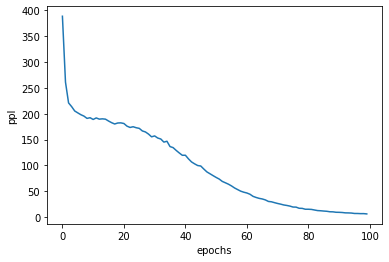

In [17]:
import sys
sys.path.append('. .')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import  SGD
from dataset import ptb

#ハイパーパラメータの設定
batch_size = 10
wordvec_size = 100
hidden_size = 100
time_size = 5
lr = 0.1
max_epoch = 100

#学習データの読み込み（データセットを小さくする）
corpus,word_to_id,id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus)+1)

xs = corpus[:-1]
ts = corpus[1:]
data_size = len(xs)
print('corpus size:%d,vocabulary size: %d' %(corpus_size,vocab_size))

#学習時に使用する変数
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

#モデルの生成
model = SimpleRnnlm(vocab_size,wordvec_size,hidden_size)
optimizer = SGD(lr)

#1ミニバッチの各サンプルの読み込み開始位置を計算
jump = (corpus_size - 1) // batch_size
offsets = [i*jump for i in range(batch_size)]

for epoch in range(max_epoch):
  for iter in range(max_iters):
    #2ミニバッチの取得
    batch_x = np.empty((batch_size,time_size),dtype='i')
    batch_t = np.empty((batch_size,time_size),dtype = 'i')
    for t in range(time_size):
      for i, offset in enumerate(offsets):
        batch_x[i,t] = xs[(offset + time_idx) % data_size]
        batch_t[i,t] = ts[(offset + time_idx) % data_size]
      time_idx += 1 

    loss = model.forward(batch_x,batch_t)
    model.backward()
    optimizer.update(model.params,model.grads)
    total_loss += loss
    loss_count += 1
  ppl = np.exp(total_loss / loss_count) 
  print('| epoch %d | perplexity % .2f' % (epoch +1,ppl))
  ppl_list.append(float(ppl))
  total_loss,loss_count = 0,0   

# グラフの描画
#markers = {'train': 'o', 'test': 's'}
plt.plot(ppl_list)
plt.xlabel("epochs")
plt.ylabel("ppl")
plt.show()

# 感想
形態素解析については、今まで英語で原理を理解したものの日本語版モジュールの使い方を知るという感じで特に難しくは感じなかった。ただ、日本語の構成？というものをほぼほぼ忘れているので思い出さなければいけないと感じた。
word2vecも同様にモジュールの使い方だったので特に困難に感じなかった。
<br>
次にRNNLMについて、上のプログラムでppl_listを出力した。グラフを見てわかる通り、pplが小さくなっている。pplは小さくなるほど候補が絞れているということなのでうまく学習できていると言える。
RNNLMについてだが、いまいち理解ができていないように感じている。うまく言えないが、何をしているかはわかるけど具体的な計算のイメージが細かく言語化できない状況にあるように感じている。言語化できないということはプログラムは当然くめないので、ニューラルネットワークの初めの方から手を動かしながら復習しつつ進めなければいけないと思った。多分原因は行列が苦手であることだと思われる...。おそらく来週以降から前よりは時間が取れる予定なので復習も進めていきたい。

